Group Members: 
- Pflum, Jordan
- Walton, Troy
- Wang, Nai
               
Due Date: 07/29/2020

# NYC Restraunts
We will analyze restraurnt inspections in New York City, starting November 1, 2014 and ending January 31, 2015. The data is in the file NYC_Restaurants.csv

**Setup:** First read in the data using
* df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

This ensures that all fields are read in as strings, and loading the data is relatively fast.

In [168]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

Populating the interactive namespace from numpy and matplotlib


c:\users\jorda\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Q1 (6pts)
Create a unique name for each restaurant. On the
DataFrame created above, add a new column to your DataFrame, called
'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE,
and BORO fields. For example, "WENDY'S 469 FLATBUSH AVENUE
11225 BROOKLYN". Print the first 10 values of the RESTAURANT column
of your DataFrame.

In [179]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df["STREET"] + ' ' + df["ZIPCODE"] + ' ' + df["BORO"]
print(df['RESTAURANT'][:10])

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


## Q2 (6pts)
How many restaurants are included in the data? Careful now:
* A "Subway in one particular address (ie, building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [180]:
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')
print(uniqueRestaurantsDF["RESTAURANT"].size)

10114


## Q3 (6 pts)
How many chains are there? Let us define a chain to be the same restaurant name occurring in at least two different (building, streeet, zipcode, boro) addresses (ie, one DBA with multiple restaurant locations). You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [181]:
# Get Unique Restaurants
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')

# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Keep only restraunts where their name occur more than once
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant > 1)
chainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
numChianRestaurants = chainRestaurants.sum()

# Print number of chains
print(numChianRestaurants)

1666


## Q4 (6pts)
Plot a bar graph of the top 20 most popular chains. We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

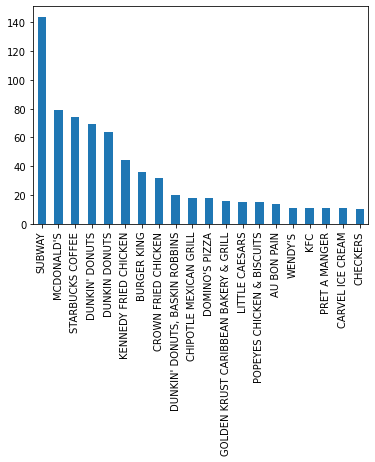

In [182]:
top20Chains = chainRestaurants[:20]
top20Chains.plot(kind='bar')

## Q5 (6pts)
What fraction of all restaurants are chain restaurants?

In [184]:
# Calculate Total num of Restaurants
numTotalRestaurants = numRestaurantPerRestaurant.sum()

# Calculate Total num of Restaurants that are Chains
numTotalChainRestraunts = chainRestaurants.sum()

# Calculate Percent of Resaurants that are Chains
percentChainRestraunts = numTotalChainRestraunts/numTotalRestaurants

percentChainRestraunts
#uniqueRestaurantsDF[mask_ChainRestaurant,].size

0.16472216729286138

Question: All restaurant Names or total restauants

## Q6 (6pts)
Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at plot; we don't want to see...oh...the "missing boro.

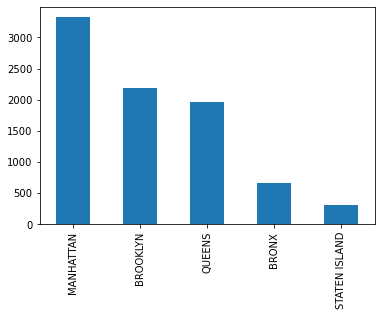

In [185]:
# Data Cleansing
# Remove Missing Borough Information
mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan # This sets the value to NaN

# Get Unique Restaurants
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')

# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Keep only restraunts where their name occur only once (non-chains)
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant == 1)
nonchainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
nonchainRestaurantsList = nonchainRestaurants.index.tolist()

# Adjust Original Dataframe
mask = uniqueRestaurantsDF['DBA'].isin(nonchainRestaurantsList)
nonChianRestaurants = uniqueRestaurantsDF[mask]

numNonchainRestaurantsPerBoro = nonChianRestaurants['BORO'].value_counts()

numNonchainRestaurantsPerBoro.plot(kind='bar')

## Q7 (6pts)
Plot the fraction of non-chain restaurants in each boro. The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

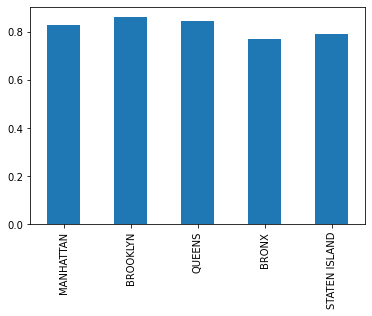

In [186]:
# Get Unique Restaurants
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')

# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Non-Chains
# Keep only restraunts where their name occur only once (non-chains)
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant == 1)
nonchainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
nonchainRestaurantsList = nonchainRestaurants.index.tolist()

# Create Dataframe with only non-chain restaurants
mask = uniqueRestaurantsDF['DBA'].isin(nonchainRestaurantsList)
nonChianRestaurants = uniqueRestaurantsDF[mask]

# Count number of non chain restaurants per boro
numNonchainRestaurantsPerBoro = nonChianRestaurants['BORO'].value_counts()

# Total Restaurants Per Boro
restaurantsPerBoro = uniqueRestaurantsDF['BORO'].value_counts()

nonChainRestaurantsPerBoroRatio = numNonchainRestaurantsPerBoro / restaurantsPerBoro

nonChainRestaurantsPerBoroRatio.plot(kind='bar')

The boro with the most independent restaurants (Manhattan) is not the boro with the highest ratio of independent restaurants (Brooklyn)

## Q8 (6pts)
Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

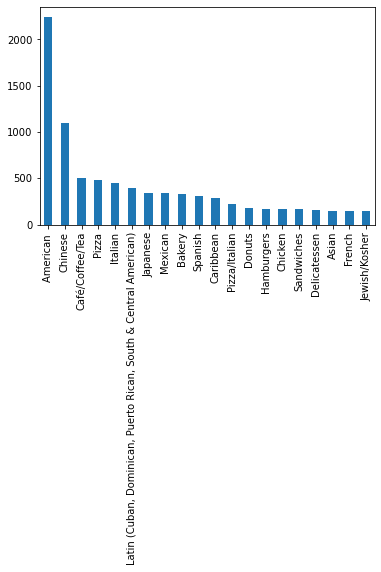

In [191]:
# Count of Restaurants by Cuisine
cuisinePopularity = uniqueRestaurantsDF['CUISINE DESCRIPTION'].value_counts()

# Plot top 20 cuisines
top20Cuisines = cuisinePopularity[:20]
top20Cuisines.plot(kind='bar')

## Q9 (9pts)
Plot the cuisines among restaurants which never got cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the 'VIOLATION CODE' field is missing.

First, find the restaurants that were never cited for a code violation. Then compute the populartity of each cuisine among these "clean" restaurants. Plot the popularity of the top-20 among these cuisines.

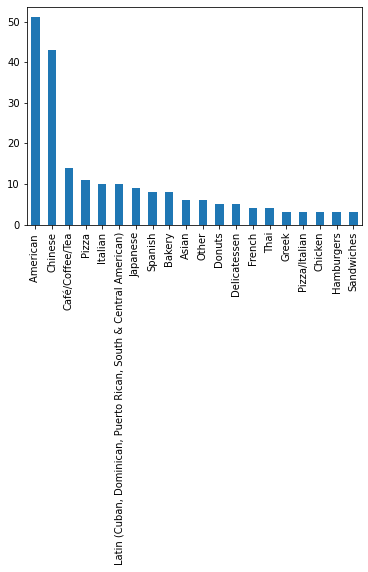

In [192]:
# Group by restaurant
restaurantComplaintDF = pd.crosstab(df['RESTAURANT'], df['VIOLATION CODE'])
restaurantsWithComplains = restaurantComplaintDF.index.tolist()

# Keep only restaurants that have only nulls (totally clean restaurants)
mask = ~df['RESTAURANT'].isin(restaurantsWithComplains)
cleanRestaurants = df[mask]

# Count Cuisines in Clean Restaurants
cleanCuisinePopularity = cleanRestaurants['CUISINE DESCRIPTION'].value_counts()

# Plot top 20 clean restaurants cuisines
top20CleanRestaurantCuisines = cleanCuisinePopularity[:20]
top20CleanRestaurantCuisines.plot(kind='bar')

## Q10 (pts6)
What cuisines tend to be the "cleanest"?
* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are those cuisines whose restaurants are "most likely to be clean."

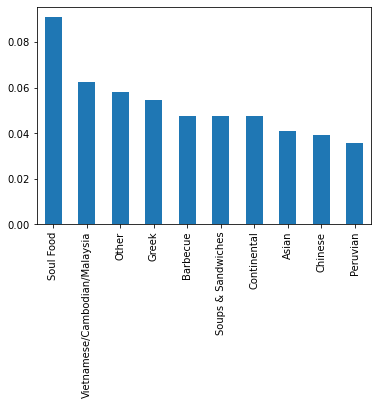

In [193]:
## Total Resaurants per Cuisine ##
# Get Unique Restaurants
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')

# Count of Restaurants by Cuisine
cuisinePopularity = uniqueRestaurantsDF['CUISINE DESCRIPTION'].value_counts()

# Keep only cuisines that appear 20 or more times
numRestaurantPerRestaurant_mask = (cuisinePopularity >= 20)
popularCuisineCounts = cuisinePopularity[numRestaurantPerRestaurant_mask]
popularCuisineList = popularCuisineCounts.index.tolist()

# Create Dataframe with only popular cuisines
mask = uniqueRestaurantsDF['CUISINE DESCRIPTION'].isin(popularCuisineList)
popularCuisineRestaurants = uniqueRestaurantsDF[mask]

# Compute total restaurants for each cuisine
totalRestaurantsPerCuisine = popularCuisineRestaurants['CUISINE DESCRIPTION'].value_counts()

## Clean Restaurants per Cuisine ##
# Group by restaurant
restaurantComplaintDF = pd.crosstab(df['RESTAURANT'], df['VIOLATION CODE'])
restaurantsWithComplains = restaurantComplaintDF.index.tolist()

# Keep only restaurants that have only nulls (totally clean restaurants)
mask = ~df['RESTAURANT'].isin(restaurantsWithComplains)
cleanRestaurants = df[mask]

# Count Cuisines in Clean Restaurants
cleanCuisinePopularity = cleanRestaurants['CUISINE DESCRIPTION'].value_counts()

## Ratio of Clean Restaurants per Cuisine to total restaurants per Cuisine ##
# Compute Ratio of Clean Cuisines vs Total Cuisines
cleanPopularCuisineRatio = cleanCuisinePopularity / totalRestaurantsPerCuisine

# Drop NAs
mask = cleanPopularCuisineRatio.notnull()
cleanPopularCuisineRatio = cleanPopularCuisineRatio[mask]

# Sort Values
cleanPopularCuisineRatio = cleanPopularCuisineRatio.sort_values(ascending=False)

# Plot Top 10 Cuisines with highest Ratio
top20CuisineRatios = cleanPopularCuisineRatio[:10]
top20CuisineRatios.plot(kind='bar')

## Q11 (8pts)
What are the most common violations in wach borough? Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough. 

To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class.

One you do have the table, you will still need to find the most common violation description for each borough.

In [194]:
# Using Group By
#violationPerBorough = uniqueRestaurantsDF.groupby('BORO')['VIOLATION CODE'].value_counts()

# Using Crosstab
violationPerBorough = pd.crosstab(df['BORO'], df['VIOLATION CODE'])

# Print Out Top Violations per Borough
for boro in violationPerBorough.index:
    # Sort Violations for each Borough
    violationSorted = violationPerBorough.loc[boro].sort_values(ascending=False)
    print(str(str(boro) + ': ' + str(violationSorted.index[0]) + ', '+ str(violationSorted[0])))


BRONX: 10F, 500
BROOKLYN: 10F, 1485
MANHATTAN: 10F, 2417
QUEENS: 10F, 1416
STATEN ISLAND: 10F, 230


## Q12 (9pts)
What are the most common violations per borough, after normalizing for the relative abundance of each violation? Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.
* Get overall frequencies: Figure out how common each violation is, over the entire dataset; lets call this violationFrequency.
* Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; ie, divide the series of violations by violationFrequency. We want to do this for each borough.
* Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

In [195]:
# Get Overall Frequencies
violationFrequency = df['VIOLATION CODE'].value_counts()

# Normalize

# Print Out Top Violations per Borough
for boro in violationPerBorough.index:
    # Normalize Violations for each Borough
    violationNormalized = violationPerBorough.loc[boro] / violationFrequency
    
    # Sort Violations
    violationNormalizedSorted = violationNormalized.sort_values(ascending=False)
    
    print(str(str(boro) + ': ' + str(violationNormalizedSorted.index[0]) + ', '+ str(violationNormalizedSorted[0])))

BRONX: 04I, 0.5
BROOKLYN: 02D, 0.7142857142857143
MANHATTAN: 03E, 1.0
QUEENS: 05B, 1.0
STATEN ISLAND: 03C, 0.09090909090909091


## Q13 (8pts)
How many phone area codes correspond to a single zipcode? The first three digits of the restaurant phone numbers are their area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figue out how many area codes have this property.
* To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [196]:
zipcodePhoneNumDF = df[["ZIPCODE", "PHONE"]]

#def areaCode(phoneNumber):
#    return phoneNumber[0:2]

zipcodePhoneNumDF.loc[:,'AREA CODE'] = zipcodePhoneNumDF["PHONE"].str[0:3]

zipCodesPerAreaCode = pd.crosstab(zipcodePhoneNumDF['AREA CODE'], zipcodePhoneNumDF['ZIPCODE'] , normalize='index')

zipCodesPerAreaCode['max'] = zipCodesPerAreaCode.max(axis=1)

zipCodesPerAreaCode = zipCodesPerAreaCode[zipCodesPerAreaCode['max']==1]
len(zipCodesPerAreaCode.index)

c:\users\jorda\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\jorda\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


34

## Q14 (10pts)
Find common misspellings of street names. Sometimes, it *Avenue*, and sometimes, its *Ave*. We will try to come up with an automated way to find common misspellings. The idea is the following: if *Ave* and *Avenue* are the same, they should show up often in similar-sounding street names, e.g., *Lexington Ave* and *Lexington Avenue*.
* Create a new column, called STREET_TYPE, which is the last word in the name of the street. For example, if the street is *"Astoria Boulevard"*, the street type should be *"Boulevard"*.
* Create another column, called STREET_BASE, which contains everything *but* the last word in the name of the street. For example, if the street is *"Astoria Boulevard"*, the street base should be *"Astoria"*.
* Create a third column, called STREET_BASE_ZIP, that combines the street base and the zipcode.
* Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.
* Merge this table with itself, on the STREEt_BASE_ZIP column. Thus, in the new merged tabled, we will have two STREET_TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.
* From the merged table, select only the rows where the street types are different.
* Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET_BASE_ZIP.
* From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.

In [197]:
def getLastWord(row):
    val = row.split()[-1]
    return val

def getBaseWords(row):
    val = row.split()[:-1]
    return ' '.join(val)

df['STREET_TYPE'] = df['STREET'].map(getLastWord)
df['STREET_BASE'] = df['STREET'].map(getBaseWords)
df['STREET_BASE_ZIP'] = df[['STREET_BASE', 'ZIPCODE']].agg(' '.join, axis=1)

table = df[['STREET_TYPE', 'STREET_BASE', 'STREET_BASE_ZIP']]
# Check On Subsetting Duplicates
table = table.drop_duplicates()
table = table[table['STREET_BASE'].notna()]


mergedTable = pd.merge(table, table, on=table['STREET_BASE_ZIP'])

mergedTable = mergedTable.loc[mergedTable['STREET_TYPE_x'] != mergedTable['STREET_TYPE_y']]
mergedTableCrossTab = pd.crosstab(mergedTable['STREET_TYPE_x'], mergedTable['STREET_TYPE_y'])

types = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']
for t in types:
    print(str(str(t) + ': ' + str(mergedTableCrossTab[t].idxmax())))

AVE: AVENUE
ST: STREET
RD: ROAD
PL: PLACE
BOULEARD: BLVD
BULEVARD: BLVD
